In [1]:
# Importing the Libraries
import pandas as pd
import re as regex
import seaborn as sns
import nltk
from tqdm import tqdm_notebook as bar
nltk.download('stopwords')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\yash\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [2]:
# Importing Natural Language Processing Libraries
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, words
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
# Importing the Dataset
df = pd.read_csv('data.csv')

In [4]:
# Displaying first 10 rows of DataFrame
df.head()

,Unnamed: 0,file,message
0,0,rodrique-r/all_documents/116.,Message-ID: <6426584.1075858324441.JavaMail.ev...
1,1,rodrique-r/all_documents/117.,Message-ID: <33441464.1075858324463.JavaMail.e...
2,2,rodrique-r/all_documents/118.,Message-ID: <13964941.1075858324484.JavaMail.e...
3,3,rodrique-r/all_documents/119.,Message-ID: <29067138.1075858324506.JavaMail.e...
4,4,rodrique-r/all_documents/12.,Message-ID: <26674422.1075858322187.JavaMail.e...


## Data Preprocessing and Feature Engineering

By Analysis, it was found out that for each row Mail Body starts just after the key-value pair of X-FileName in the dataset. Thus, part upto that is useless and can be removed. Therefore, we only need to focus on the part after that.

In [5]:
''' Mail Extraction - Cleaning out unimportant information from each row '''

# Using RegEx to keep the content after the pattern "X-FileName" from each row and removing the other part
df['message'] = df['message'].apply(lambda x : regex.split(r'(?<=X-FileName)', x)[1])

# Now removing the File Name which still exists after the first step of Mail Extraction
df['message'] = df['message'].apply(lambda x : regex.split(r'(?<=\n\n)', x))

# At Last merging the remaining data and converting it into a string
df['message'] = df['message'].apply(lambda x : "".join(x[1:]))

In [6]:
# Displaying the first 10 rows of processed data after applying first step of data preprocessing
df.head(10)

,Unnamed: 0,file,message
0,0,rodrique-r/all_documents/116.,I'm leaving. I'll see you Monday. Hope you h...
1,1,rodrique-r/all_documents/117.,She does seem pretty impressed that she's effe...
2,2,rodrique-r/all_documents/118.,I don't think she thinks we kept it a secret v...
3,3,rodrique-r/all_documents/119.,"Brian,\n\nWe have someone new doing the P&L no..."
4,4,rodrique-r/all_documents/12.,I hate Canada.
5,5,rodrique-r/all_documents/120.,Apparently she thought Valentines was like a f...
6,6,rodrique-r/all_documents/121.,Binh Knows...she quizzed me as soon as I sat d...
7,7,rodrique-r/all_documents/122.,Jeff said if we were going to spend that much ...
8,8,rodrique-r/all_documents/123.,"Hey,\n\nEveryone's asked me how the happy hour..."
9,9,rodrique-r/all_documents/124.,Apparently you can't open the link so here's a...


In [7]:
# dropping file column because it is useless
df = df.drop('file', axis=1)

In [8]:
# Checking for Null Values
df.isnull().sum()

Unnamed: 0    0
message       0
dtype: int64

Since there're no Null Values present that means we can directly proceed to Keyword Extraction

## Keyword Extraction

In [9]:
# Creating instance to Perform Lemmatization and creating an empty Corpus
lemmatizer = WordNetLemmatizer()
corpus = []
stop = set(stopwords.words())
dictionary = words.words()

In [10]:
# Performing Natural Language Preprocessing
for idx in bar(range(df.shape[0])):
    text = regex.sub('[^a-zA-Z]', ' ', df['message'][idx])        # Substituting ' ' wherever numbers or special symbols are present
    text = text.lower()
    text = text.split()
    text = [lemmatizer.lemmatize(word) for word in text if word not in stop and word in dictionary]
    text = ' '.join(text)
    corpus.append(text)

### For Unigrams

In [11]:
# Fitting Bag-of-Words Model and generating Vectors for Unigrams
co_ve = CountVectorizer(ngram_range=(1,1))
bag_of_words = co_ve.fit_transform(corpus).toarray()

In [12]:
# Creating the Frequency Dictionary for Unigrams
sum_words = bag_of_words.sum(axis=0)
words_freq = dict()
for word, freq in zip(sorted(co_ve.vocabulary_, key=lambda x: x[0], ), list(sum_words)):
    words_freq[word] = freq

# Sorting Keywords by their freq of occurrences in reverse order
words_freq = dict(sorted(words_freq.items(), key=lambda kv:(kv[1], kv[0]), reverse=True))

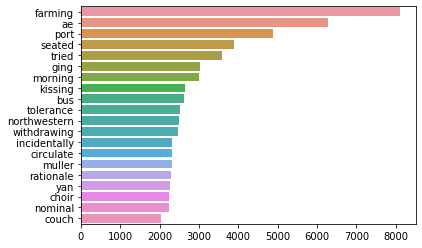

In [13]:
# Plotting a Barplot for Top 20 Occurred Unigrams
sns.barplot(y=list(words_freq.keys())[:20], x=list(words_freq.values())[:20])

### For Bigrams

In [14]:
# Fitting Bag-of-Words Model and generating Vectors for Bigrams
co_ve = CountVectorizer(ngram_range=(2,2))
bag_of_words = co_ve.fit_transform(corpus).toarray()

In [15]:
# Creating the Frequency Dictionary for Unigrams
sum_words = bag_of_words.sum(axis=0)
words_freq = dict()
for word, freq in zip(sorted(co_ve.vocabulary_, key=lambda x: x[0], ), list(sum_words)):
    words_freq[word] = freq

# Sorting Keywords by their freq of occurrences in reverse order
words_freq = dict(sorted(words_freq.items(), key=lambda kv:(kv[1], kv[0]), reverse=True))

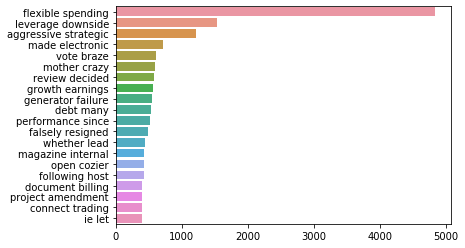

In [16]:
# Plotting a Barplot for Top 20 Occurred Bigrams
sns.barplot(y=list(words_freq.keys())[:20], x=list(words_freq.values())[:20])

### For Trigrams

In [17]:
# Fitting Bag-of-Words Model and generating Vectors for Trigrams
co_ve = CountVectorizer(ngram_range=(3,3))
bag_of_words = co_ve.fit_transform(corpus).toarray()

In [18]:
# Creating the Frequency Dictionary for Unigrams
sum_words = bag_of_words.sum(axis=0)
words_freq = dict()
for word, freq in zip(sorted(co_ve.vocabulary_, key=lambda x: x[0], ), list(sum_words)):
    words_freq[word] = freq

# Sorting Keywords by their freq of occurrences in reverse order
words_freq = dict(sorted(words_freq.items(), key=lambda kv:(kv[1], kv[0]), reverse=True))

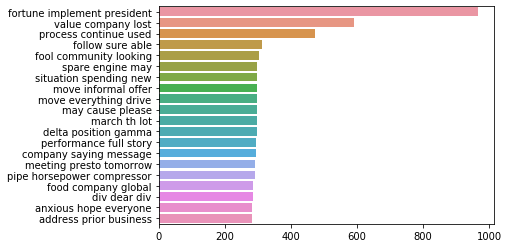

In [19]:
# Plotting a Barplot for Top 20 Occurred Trigrams
sns.barplot(y=list(words_freq.keys())[:20], x=list(words_freq.values())[:20])